<a href="https://colab.research.google.com/github/Radio-active-Boys/ML/blob/ML/Linear_Regression_Advance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [253]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [254]:
Data = pd.read_csv('/content/drive/MyDrive/Python/ML/Files/M5T1_helper_text/M5T1_helper_text (1)/Transformed_Housing_Data2.csv')

In [255]:
Data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,0,0,1,0,0,0,0,0


# scalling data

In [256]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Y = Data['Sale_Price']
X = scaler.fit_transform(Data.drop(columns = ['Sale_Price']))
X = pd.DataFrame(data = Data, columns = Data.drop(columns = ['Sale_Price']).columns)
X.head()


,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,63,...,0,0,0,0,0,0,0,0,0,0
1,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,67,...,0,0,1,0,0,0,0,0,0,0
2,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,85,...,0,0,1,0,0,0,0,0,0,0
3,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,53,...,0,0,0,1,0,0,0,0,0,0
4,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,31,...,0,0,0,0,1,0,0,0,0,0


In [257]:
X.corr()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
No of Bedrooms,1.000000,0.515813,0.576628,0.031692,0.175536,0.079575,0.349223,0.477549,0.303294,-0.154113,...,-0.006578,-0.010603,-0.039342,-0.074129,0.024433,0.019420,0.090177,0.016725,0.102736,0.035694
No of Bathrooms,0.515813,1.000000,0.754568,0.087732,0.500776,0.187791,0.635638,0.685088,0.283798,-0.505954,...,0.063761,-0.032810,-0.081460,-0.034459,0.084054,0.052804,0.123256,0.037746,0.110012,0.067871
Flat Area (in Sqft),0.576628,0.754568,1.000000,0.172721,0.354142,0.284678,0.705725,0.876226,0.435142,-0.318146,...,0.103841,-0.058817,-0.063005,-0.078761,0.086139,0.075978,0.160045,0.051211,0.169576,0.090253
Lot Area (in Sqft),0.031692,0.087732,0.172721,1.000000,-0.005162,0.074668,0.102314,0.183492,0.015252,-0.053119,...,0.021605,0.023684,0.052103,-0.041112,-0.012050,0.015320,-0.023270,-0.027419,-0.007025,0.002671
No of Floors,0.175536,0.500776,0.354142,-0.005162,1.000000,0.029504,0.461368,0.524031,-0.245572,-0.489244,...,0.023719,-0.003385,-0.067904,0.079211,0.071786,0.009203,0.069857,0.064981,-0.008633,0.005868
No of Times Visited,0.079575,0.187791,0.284678,0.074668,0.029504,1.000000,0.223661,0.167812,0.276974,0.053395,...,0.401856,-0.065000,0.004754,0.005905,0.003509,0.024801,0.068144,-0.012548,0.065335,0.012923
Overall Grade,0.349223,0.635638,0.705725,0.102314,0.461368,0.223661,1.000000,0.705153,0.145232,-0.456711,...,0.070332,-0.075495,-0.121379,-0.047869,0.151245,0.095613,0.200548,0.077126,0.156952,0.048638
Area of the House from Basement (in Sqft),0.477549,0.685088,0.876226,0.183492,0.524031,0.167812,0.705153,1.000000,-0.051825,-0.423848,...,0.072099,-0.028348,-0.052418,-0.090628,0.086640,0.062267,0.129310,0.029477,0.134021,0.087398
Basement Area (in Sqft),0.303294,0.283798,0.435142,0.015252,-0.245572,0.276974,0.145232,-0.051825,1.000000,0.133072,...,0.080595,-0.069149,-0.032302,0.006247,0.016422,0.040662,0.090206,0.051128,0.101159,0.023775
Age of House (in Years),-0.154113,-0.505954,-0.318146,-0.053119,-0.489244,0.053395,-0.456711,-0.423848,0.133072,1.000000,...,0.026149,-0.070111,0.022094,0.095882,-0.056974,-0.009965,0.025718,0.101486,-0.002705,-0.002492


# calculating correlation between in dependend variables

In [258]:
k = X.corr()
z = [[str(i),str(j)]   for i in k.columns for j in k.columns if( (k.loc[i,j] > abs(0.5)) & (i!=j))]
z,len(z)

([['No of Bedrooms', 'No of Bathrooms'],
  ['No of Bedrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Bedrooms'],
  ['No of Bathrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Floors'],
  ['No of Bathrooms', 'Overall Grade'],
  ['No of Bathrooms', 'Area of the House from Basement (in Sqft)'],
  ['No of Bathrooms', 'Living Area after Renovation (in Sqft)'],
  ['Flat Area (in Sqft)', 'No of Bedrooms'],
  ['Flat Area (in Sqft)', 'No of Bathrooms'],
  ['Flat Area (in Sqft)', 'Overall Grade'],
  ['Flat Area (in Sqft)', 'Area of the House from Basement (in Sqft)'],
  ['Flat Area (in Sqft)', 'Living Area after Renovation (in Sqft)'],
  ['Lot Area (in Sqft)', 'Lot Area after Renovation (in Sqft)'],
  ['No of Floors', 'No of Bathrooms'],
  ['No of Floors', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 'No of Bathrooms'],
  ['Overall Grade', 'Flat Area (in Sqft)'],
  ['Overall Grade', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 

# Calculating VIF ( Variance _ inflation Factor )
  ##  Importing Variance _ inflation Factor funtion from the Statsmodels


In [259]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = X
VIF = pd.Series([variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1])] , index = vif_data.columns )
VIF

No of Bedrooms                                   23.151025
No of Bathrooms                                  28.814318
Flat Area (in Sqft)                            9082.024765
Lot Area (in Sqft)                                2.372363
No of Floors                                     18.024881
No of Times Visited                               1.559620
Overall Grade                                   140.408600
Area of the House from Basement (in Sqft)      6829.552868
Basement Area (in Sqft)                         495.289062
Age of House (in Years)                           8.211540
Latitude                                     272659.085671
Longitude                                    271581.076709
Living Area after Renovation (in Sqft)           27.893476
Lot Area after Renovation (in Sqft)               2.590360
Years Since Renovation                            2.866211
Condition_of_the_House_Excellent                 58.086832
Condition_of_the_House_Fair                     473.2629

In [260]:
VIF[VIF == VIF.max()].index[0]

'Latitude'

In [261]:
def MC_remover(data):
    vif = pd.Series([variance_inflation_factor(data.values, i) for i in range(data.shape[1])], index=data.columns)
    if vif.max() > 5:
        print(vif[vif == vif.max()].index[0], "has been removed")
        data = data.drop(columns=[vif[vif == vif.max()].index[0]])
        return MC_remover(data)
    else:
        print("Multi-collinearity has been removed")
        return data


In [262]:
vif_data = MC_remover(vif_data)
vif_data.head()

Latitude has been removed
Flat Area (in Sqft) has been removed
Longitude has been removed
Overall Grade has been removed
Condition_of_the_House_Fair has been removed
No of Bathrooms has been removed
Living Area after Renovation (in Sqft) has been removed
No of Bedrooms has been removed
No of Floors has been removed
Multi-collinearity has been removed


,Lot Area (in Sqft),No of Times Visited,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Lot Area after Renovation (in Sqft),Years Since Renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Good,Condition_of_the_House_Okay,...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,5650.0,0,1180.0,0,63,5650,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7242.0,0,2170.0,400,67,7639,26,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,10000.0,0,770.0,0,85,8062,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,5000.0,0,1050.0,910,53,5000,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,8080.0,0,1680.0,0,31,7503,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [263]:
VIF = pd.Series([variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1])] , index= vif_data.columns)
VIF , len(VIF)

(Lot Area (in Sqft)                           2.359516
 No of Times Visited                          1.451891
 Area of the House from Basement (in Sqft)    3.810652
 Basement Area (in Sqft)                      1.631507
 Age of House (in Years)                      3.629411
 Lot Area after Renovation (in Sqft)          2.555051
 Years Since Renovation                       2.851780
 Condition_of_the_House_Excellent             1.282969
 Condition_of_the_House_Good                  1.643404
 Condition_of_the_House_Okay                  1.029397
 Ever_Renovated_Yes                           2.996671
 Waterfront_View_Yes                          1.213205
 Zipcode_Group_Zipcode_Group_1                1.401692
 Zipcode_Group_Zipcode_Group_2                1.763574
 Zipcode_Group_Zipcode_Group_3                1.639474
 Zipcode_Group_Zipcode_Group_4                1.844062
 Zipcode_Group_Zipcode_Group_5                1.219950
 Zipcode_Group_Zipcode_Group_6                1.450277
 Zipcode_G

# Train and Test data

In [264]:
x = vif_data
y = Data['Sale_Price']
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21609 entries, 0 to 21608
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Lot Area (in Sqft)                         21609 non-null  float64
 1   No of Times Visited                        21609 non-null  int64  
 2   Area of the House from Basement (in Sqft)  21609 non-null  float64
 3   Basement Area (in Sqft)                    21609 non-null  int64  
 4   Age of House (in Years)                    21609 non-null  int64  
 5   Lot Area after Renovation (in Sqft)        21609 non-null  int64  
 6   Years Since Renovation                     21609 non-null  int64  
 7   Condition_of_the_House_Excellent           21609 non-null  int64  
 8   Condition_of_the_House_Good                21609 non-null  int64  
 9   Condition_of_the_House_Okay                21609 non-null  int64  
 10  Ever_Renovated_Yes    

In [265]:
from sklearn.model_selection import train_test_split
x_train , x_test, y_train , y_test  = train_test_split(x,y,test_size  = 0.3 , random_state=101)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((15126, 21), (6483, 21), (15126,), (6483,))

# Impliting the model

In [266]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [267]:
lr.coef_

array([ 2.89073430e-01,  4.75025739e+04,  1.50678525e+02,  1.02177639e+02,
        5.34166301e+02, -2.50617056e-01, -2.22892928e+03,  4.53116712e+04,
        6.58223659e+02, -5.76092395e+04,  8.11447429e+04,  1.18018061e+05,
        5.54283390e+04,  1.19564511e+05,  2.40586328e+05,  2.65864580e+05,
        3.30249333e+05,  3.52864853e+05,  4.72616389e+05,  4.89174783e+05,
        5.40779693e+05])

In [268]:
predictions  = lr.predict(x_test)
lr.score(x_test , y_test)

0.8016395648709014

# Residuals


In [269]:
residuals = predictions - y_test
residual_table = pd.DataFrame({'Residuals':residuals , 'Predictions': predictions})
residual_table = residual_table.sort_values(by = 'Predictions')
residual_table

,Residuals,Predictions
12773,-7.566631e+04,9.433369e+04
3715,-4.703469e+04,1.103053e+05
19510,-1.356866e+05,1.108134e+05
11586,-7.071773e+04,1.172823e+05
18057,-1.564903e+05,1.185097e+05
...,...,...
14030,4.376994e+05,1.567274e+06
15253,4.556536e+05,1.585229e+06
18475,5.267240e+05,1.656299e+06
1313,6.743192e+05,1.803894e+06


In [270]:
z = [i for i in range(int(residual_table['Predictions'].max()))]
k = [0 for i in range(int(residual_table['Predictions'].max()))]

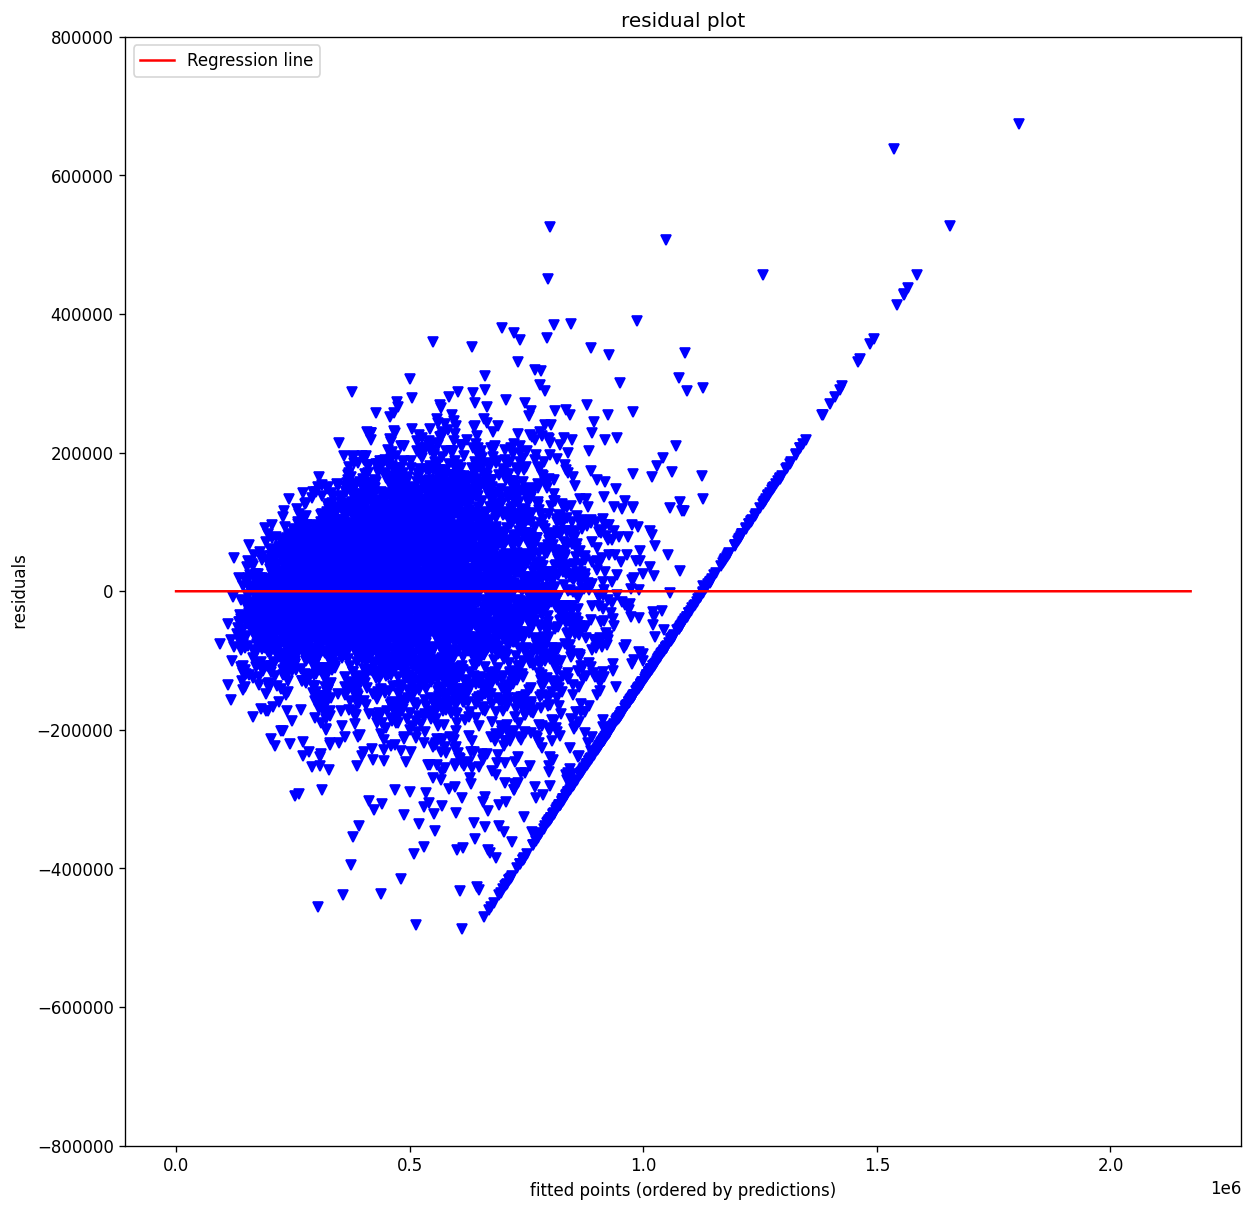

In [271]:
plt.figure(figsize = (12,12), dpi =120)
plt.plot(residual_table['Predictions'], residual_table['Residuals'],'bv')
plt.plot(z,k,'r-', label = 'Regression line')
plt.ylim(-800000, 800000)
plt.xlabel( 'fitted points (ordered by predictions)')
plt.ylabel(' residuals ' )
plt.title( 'residual plot')
plt.legend()
plt.show()



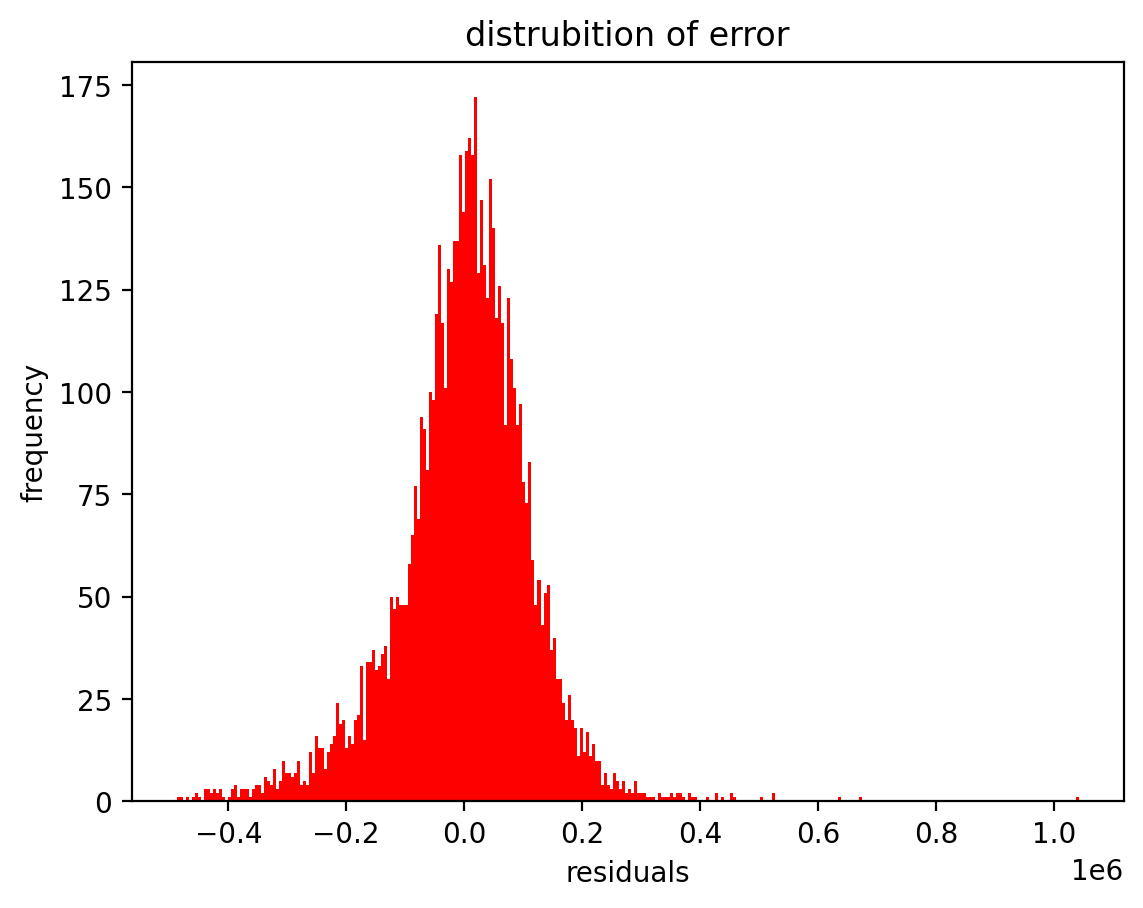

In [272]:
plt.figure( dpi= 200)
plt.hist(residual_table['Residuals'],color = 'red', bins = 300)
plt.xlabel('residuals')
plt.ylabel('frequency')
plt.title('distrubition of error')
plt.show()

# Model Coefficients

In [273]:
coefficient_table = pd.DataFrame({'columns': x_train.columns, 'coefficients':lr.coef_})
coefficient_table = coefficient_table.sort_values(by = 'coefficients')

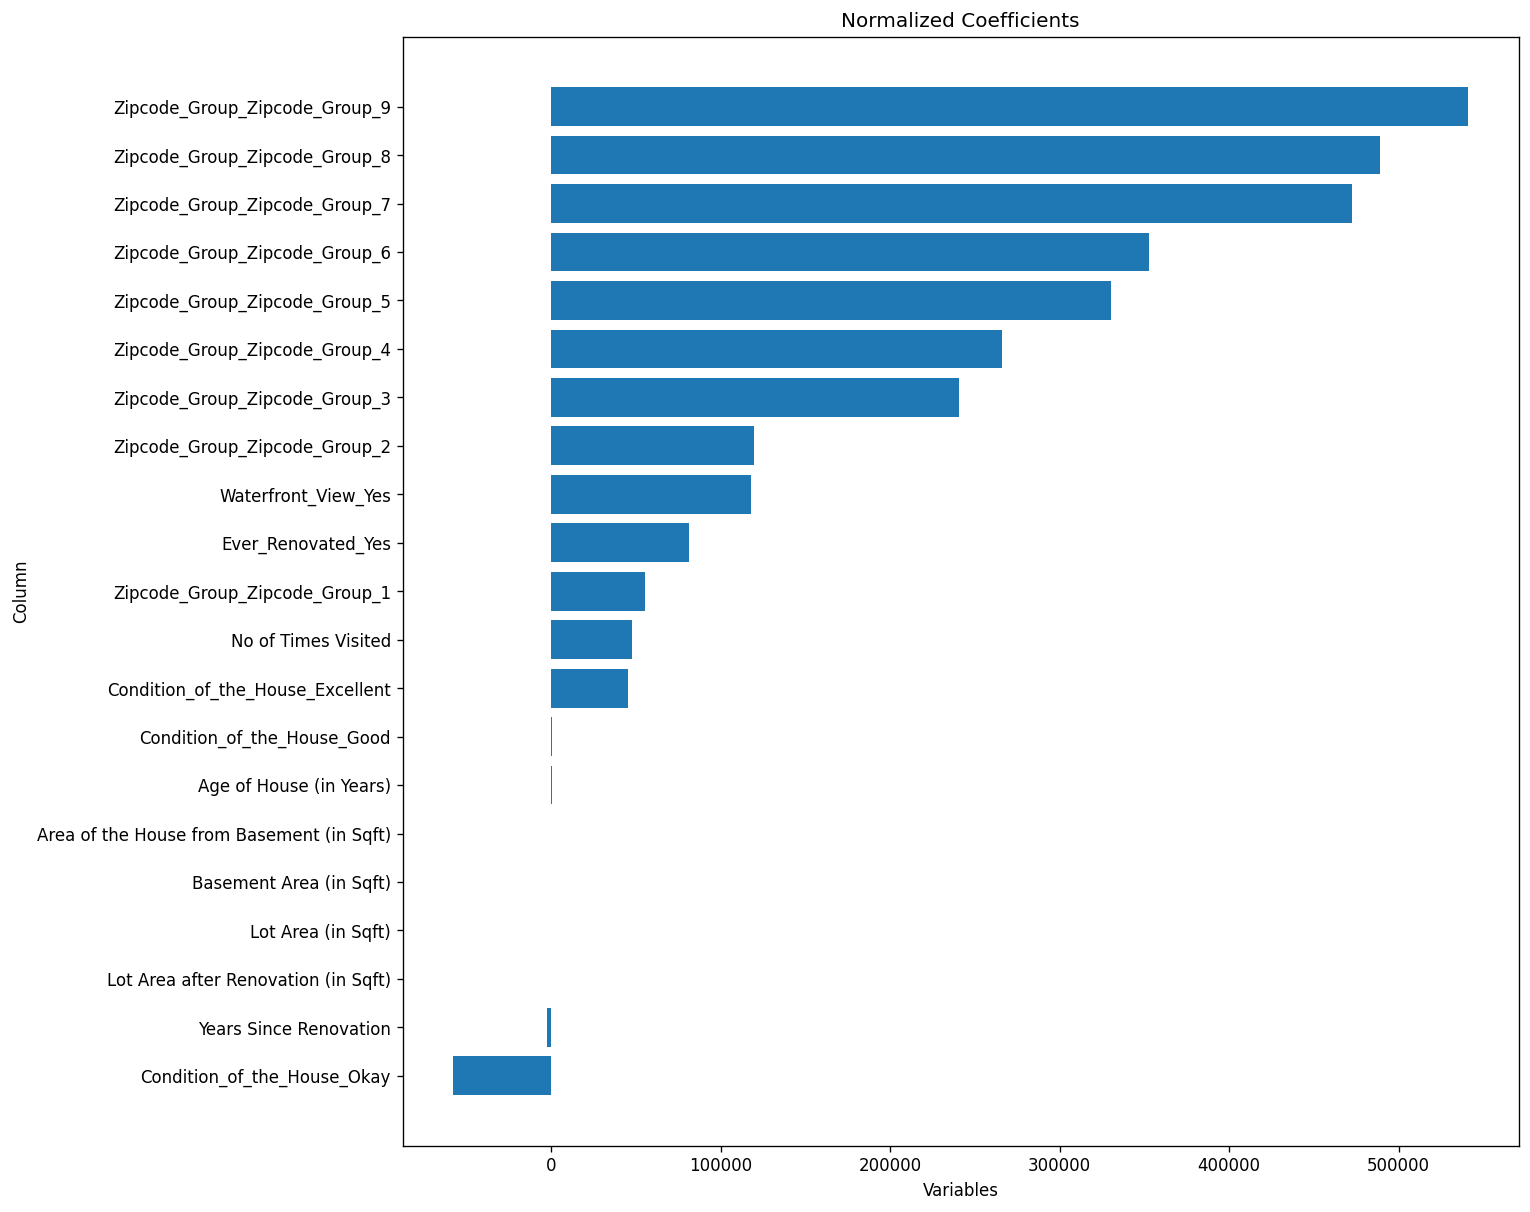

In [274]:
plt.figure(figsize= (12,12),dpi=120)
#x = coefficient_table[ 'columns']
#y  = coefficient_table[' coefficients']
plt.barh( coefficient_table['columns'],coefficient_table['coefficients'])
plt.xlabel('Variables')
plt.ylabel('Column')
plt.title('Normalized Coefficients')
plt.show()

# Feature Engineering


## Feature transformation

In [275]:
file = pd.read_csv('/content/drive/MyDrive/Python/ML/Files/M5T1_helper_text/M5T6_helper_text/Raw_Housing_Prices3.csv')
file.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


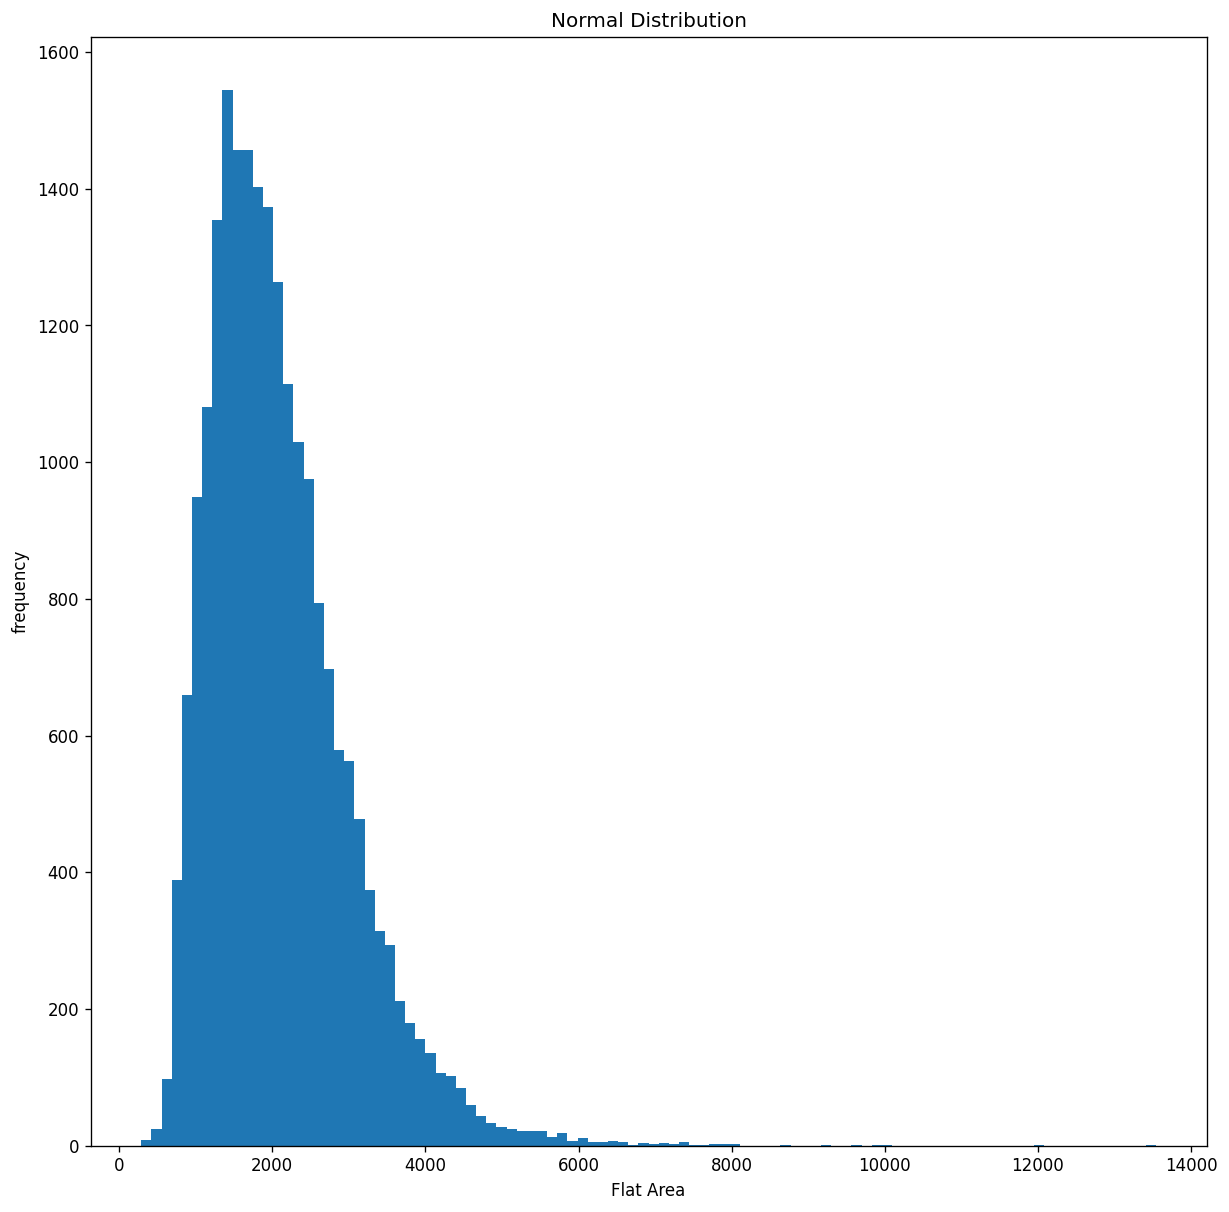

In [276]:
plt.figure(figsize = (12,12), dpi = 120)
plt.hist(file['Flat Area (in Sqft)'], bins = 100)
plt.xlabel('Flat Area')
plt.ylabel('frequency')
plt.title('Normal Distribution')
plt.show()

In [277]:
### data is Right Skewed
def log_transform(sample_data):
  return np.log(sample_data)


In [278]:
file['Transfor_Sale_price'] = file['Sale Price'].map(log_transform)


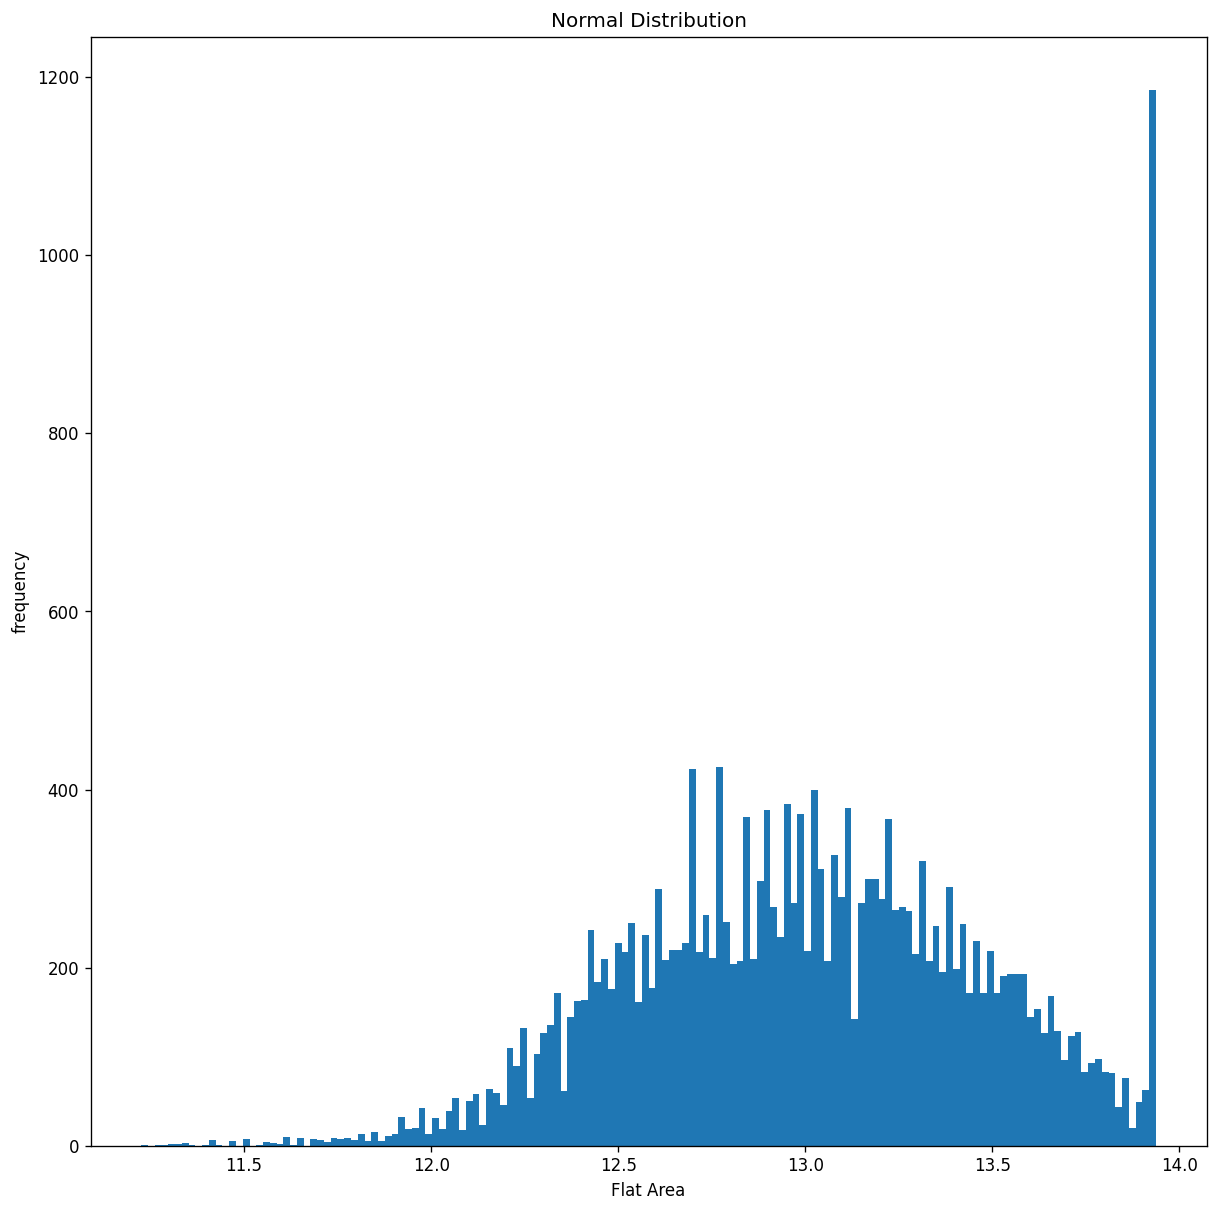

In [279]:
plt.figure(figsize = (12,12), dpi = 120)
plt.hist(file['Transfor_Sale_price'], bins = 150)
plt.xlabel('Flat Area')
plt.ylabel('frequency')
plt.title('Normal Distribution')
plt.show()

### Dummies Encoding

In [280]:
dummies_encoding = pd.get_dummies(file, columns = ['Zipcode'], drop_first = True)
dummies_encoding.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Zipcode_98146.0,Zipcode_98148.0,Zipcode_98155.0,Zipcode_98166.0,Zipcode_98168.0,Zipcode_98177.0,Zipcode_98178.0,Zipcode_98188.0,Zipcode_98198.0,Zipcode_98199.0
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,0,0,0,0,0,0,1,0,0,0
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,0,0,0,0,0,0,0,0,0,0
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,0,0,0,0,0,0,0,0,0,0
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,0,0,0,0,0,0,0,0,0,0


In [281]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21609 entries, 0 to 21608
Data columns (total 22 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

In [282]:
file['Condition of the House'].value_counts()

Fair         14028
Good          5678
Excellent     1701
Okay           172
Bad             30
Name: Condition of the House, dtype: int64

### label encoding

In [283]:
label_encoding = file['Condition of the House'].map({'Fair':3, 'Good':4, 'Excellent':5, 'Bad':1,'Okay':2})
label_encoding.value_counts()

3    14028
4     5678
5     1701
2      172
1       30
Name: Condition of the House, dtype: int64

### Binning

In Binning, we will look at the following:
####• Binning of Categorical Variables
####• Binning of Sparse Categories
####• Binning of Continuous Variables

##### Categorical Variables

In [284]:
zip_table = file.groupby('Zipcode').agg({'Sale Price':'mean'}).sort_values('Sale Price', ascending = True)
zip_table.head()

,Sale Price
Zipcode,
98002.0,234284.035176
98168.0,240328.371747
98032.0,251296.240000
98001.0,280804.690608
98148.0,284908.596491


In [285]:
zip_table[ 'Zipcode_Group'] = pd.cut(zip_table['Sale Price'], bins = 10,
labels =[ 'Zipcode_Group_0',
         'Zipcode_Group_1',
          'Zipcode_Group_2',
          'Zipcode_Group_3',
          'Zipcode_Group_4',
          'Zipcode_Group_5',
          'Zipcode_Group_6',
          'Zipcode_Group_7',
          'Zipcode_Group_8',
          'Zipcode_Group_9'],include_lowest = True)
zip_table.head(20)

,Sale Price,Zipcode_Group
Zipcode,,
98002.0,234284.035176,Zipcode_Group_0
98168.0,240328.371747,Zipcode_Group_0
98032.0,251296.240000,Zipcode_Group_0
98001.0,280804.690608,Zipcode_Group_0
98148.0,284908.596491,Zipcode_Group_0
98023.0,286486.572289,Zipcode_Group_0
98188.0,289078.345588,Zipcode_Group_0
98003.0,294111.278571,Zipcode_Group_0
98030.0,296187.980469,Zipcode_Group_0


##### Sparse Categories

In [286]:
file['Condition of the House'].value_counts()

Fair         14028
Good          5678
Excellent     1701
Okay           172
Bad             30
Name: Condition of the House, dtype: int64

In [287]:
mapping = {'Excellent':'Excellent','Good':'Good', 'Fair':'Bad','Bad':'Bad','Okay':'Good'}
Sparse_Categories = file['Condition of the House'].map(mapping)
Sparse_Categories.value_counts()

Bad          14058
Good          5850
Excellent     1701
Name: Condition of the House, dtype: int64

##### Continuous Variables

In [292]:
file['Age of House (in Years)'].head()

0    63
1    67
2    85
3    53
4    31
Name: Age of House (in Years), dtype: int64

In [293]:
def cat_red(x):
  if x<10:
    x = 'new'
  elif(x<50):
    x = 'old'
  else:
    x = 'very old'
  return x

In [294]:
Continuous_Variables  = file['Age of House (in Years)'].map(cat_red)
Continuous_Variables.unique()

array(['very old', 'old', 'new'], dtype=object)